In [1]:
pip install mlxtend


Frequent Itemsets:
   support         itemsets
0      1.0          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.8  (butter, bread)
4      0.6    (milk, bread)

Strong Association Rules:
  antecedents consequents  support  confidence  lift
0    (butter)     (bread)      0.8         1.0   1.0
1     (bread)    (butter)      0.8         0.8   1.0
2      (milk)     (bread)      0.6         1.0   1.0


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


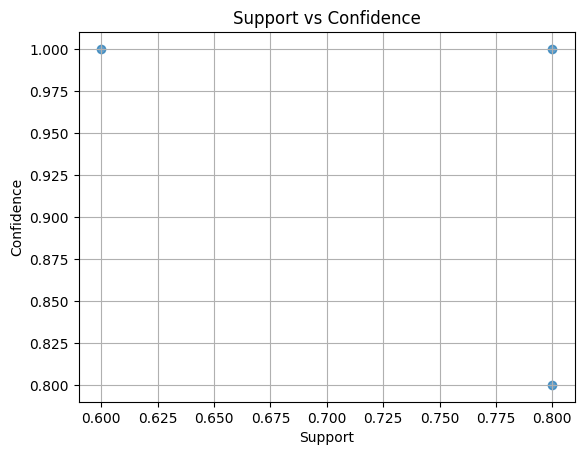

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam']
]

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate strong association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\nStrong Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.grid(True)
plt.show()

